In [1]:
base_path = 'c:/Users/tpiechowiak/OneDrive - GN Store Nord/GNOS data/'

In [2]:
#loading some stuff 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import pickle
import datetime

In [3]:
#now loading the different pickle files containing the ADL files for the different use-time categories
with open(base_path + "UseTime_resampled.pkl", "rb") as input_file:
    ADL_weekly_resampled = pickle.load(input_file)
print("Read ADL from pickle file")


Read ADL from pickle file


In [4]:
#Choose ten randomly chosen subjects 
rand_hi = np.random.choice(ADL_weekly_resampled['ADLRawData_HearingInstrumentId'].values,9, replace = False)

In [5]:
rand_hi

array(['F5B7DE95EFF5E1167CFCAE77C2494EEB7ECF621B5C485AAEDC0DDDB466080392',
       '39D3FBD36A15C84B1170896732B861C0EFDF70C605E21C3F387134910DA4D8A2',
       'A4EE505283930DBAD99B01EF4916E4CCBB294F713F273BC50291329B90322AC8',
       'E208BF2F29753055C568B3C97837765083BF1C3C05EAACB59A1EBE72A86D3E7D',
       '40FA5569C978D5922F56A77AE1CA8C568ECD0D93A434019E2D56A1FC7DBFB3E6',
       '9B0C12608803DD1A26A90D862FAB9F90B1C008D712638A1DABA733CEF9D4A4E4',
       '4143264F4D9FCF77634E8A23CC24E7D90AF527D674BB3748A8040418FC90C2B5',
       'DA0D15BCF64B90E5C42D3647B2FC9D5C4709E411EB2564647DCE101318E4F0CA',
       '5D1BBA3337D010BDF8104FE6879610CBD08E2DADAB461C9966146AD5E3E3B79D'],
      dtype=object)

In [6]:
#choose those hi that were randomly chosen
rand_hi_ADL = ADL_weekly_resampled[ADL_weekly_resampled['ADLRawData_HearingInstrumentId'].\
                                       isin(rand_hi)]

HI =  1
HI =  2
HI =  3
HI =  4
HI =  5
HI =  6
HI =  7
HI =  8
HI =  9


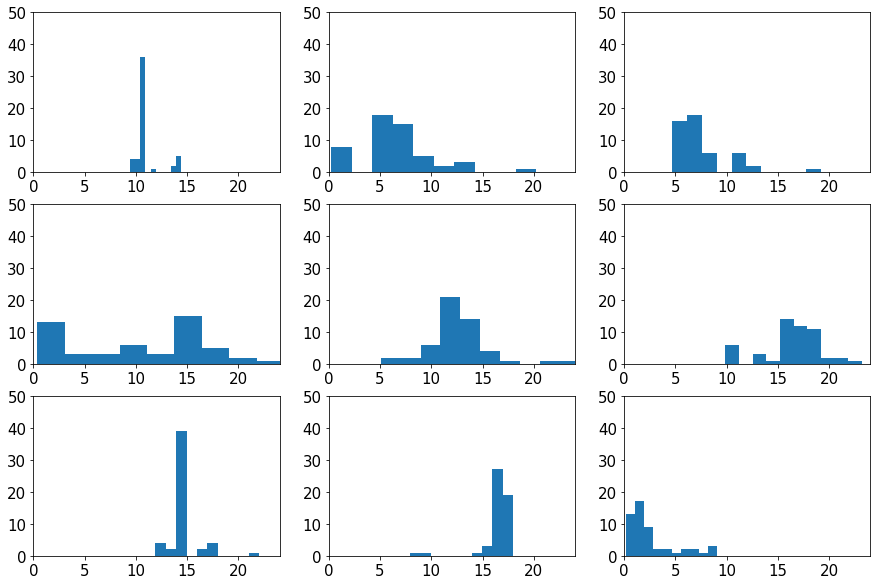

In [7]:
#make some subplots
fig = plt.figure(figsize= (15,10))
ax = dict()

for idx in range(0,3*3):
    ax[idx] = fig.add_subplot(3,3,idx+1)

#now loop over the instruments     
cnt = 0
for hi_id, group in rand_hi_ADL.groupby('ADLRawData_HearingInstrumentId'):
    tmp = group.loc['2019-01-01':'2020-01-01']
    ax[cnt].hist(tmp['UseTimeWeekly'], bins = 10) 
    ax[cnt].set_xlim(0,24)
    ax[cnt].set_ylim(0,50)
    ax[cnt].tick_params(labelsize = 15)
    cnt = cnt + 1
    print('HI = ',cnt)   
plt.show()

HI =  1
HI =  2
HI =  3
HI =  4
HI =  5
HI =  6
HI = 7
HI =  8
HI =  9


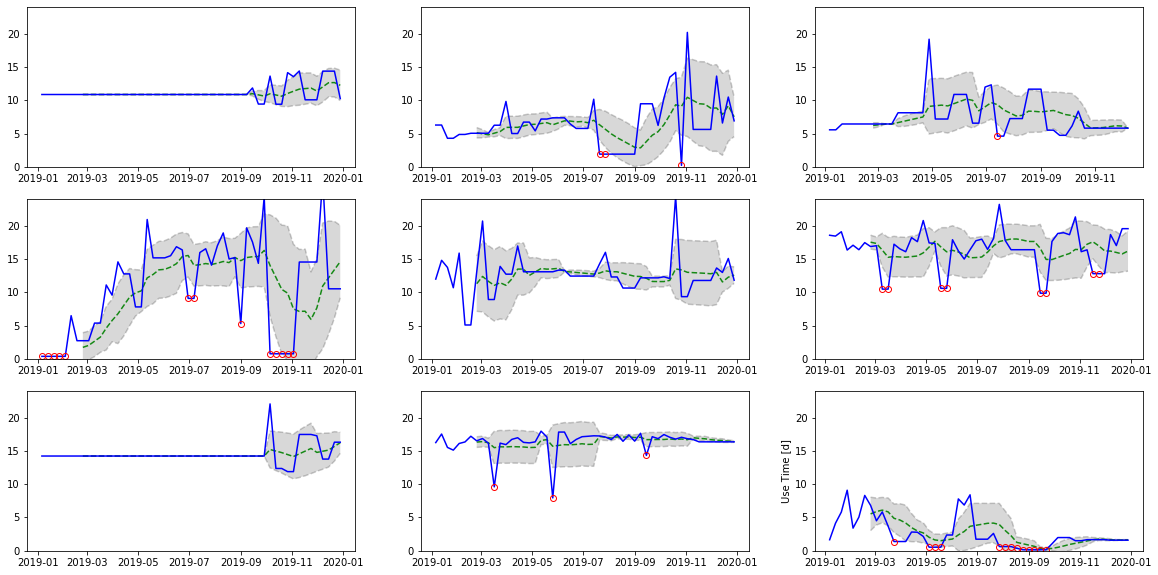

In [8]:
#now plot the individual time course 
fig = plt.figure(figsize= (20,10))
ax = dict()

for idx in range(0,3*3):
    ax[idx] = fig.add_subplot(3,3,idx+1)
    
t = pd.date_range(start='2019-01-01', end='2020-01-01',freq='W')
    
#now loop over the instruments     
cnt = 0
nr_weeks = 2*4
for hi_id, grp in rand_hi_ADL.groupby('ADLRawData_HearingInstrumentId'):
    tmp = grp['UseTimeWeekly'].loc['2019-01-01':'2020-01-01']
    ts = pd.Series(tmp, index=tmp.index)
    
    r_mean = ts.rolling(window = nr_weeks).mean()
    r_std = ts.rolling(window = nr_weeks).std()
    
    ax[cnt].plot(r_mean,'g--',alpha = 0.9)
    ax[cnt].plot(r_mean + r_std,'k--',alpha = 0.2)    
    ax[cnt].plot(r_mean - r_std,'k--',alpha = 0.2)
    ax[cnt].fill_between(ts.index,r_mean + r_std, r_mean - r_std, facecolor='grey', alpha=0.3)
    
    ax[cnt].plot(ts.index,tmp,'b-')    
    ax[cnt].set_ylim(0,24)
    ax[cnt].tick_params(labelsize = 10)

    #now the points when the use-time exceeds the variance by one hour
    idx = np.where(((r_mean - r_std) - tmp > 1) | (tmp < 1))    
    
    ax[cnt].plot(tmp.iloc[idx],'ro',mfc = 'none')
    
    #if(np.any(tmp < 1)):
     #   idx = np.where(tmp < 1)
      #  ax[cnt].plot(tmp.iloc[idx],'ro',mfc = 'none')
        
    
    cnt = cnt + 1
    print('HI = ',cnt)   
    
axes = fig.gca()    

axes.set_ylim([0, 24])
plt.ylabel('Use Time [d]')
plt.show()

In [9]:

tmp[-2], tmp[-1]

(1.5960783999999941, 1.5960783999999941)

In [10]:
pd.date_range(start='2019-01-01',end='2020-01-01',freq='1W')

DatetimeIndex(['2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10', '2019-02-17', '2019-02-24',
               '2019-03-03', '2019-03-10', '2019-03-17', '2019-03-24',
               '2019-03-31', '2019-04-07', '2019-04-14', '2019-04-21',
               '2019-04-28', '2019-05-05', '2019-05-12', '2019-05-19',
               '2019-05-26', '2019-06-02', '2019-06-09', '2019-06-16',
               '2019-06-23', '2019-06-30', '2019-07-07', '2019-07-14',
               '2019-07-21', '2019-07-28', '2019-08-04', '2019-08-11',
               '2019-08-18', '2019-08-25', '2019-09-01', '2019-09-08',
               '2019-09-15', '2019-09-22', '2019-09-29', '2019-10-06',
               '2019-10-13', '2019-10-20', '2019-10-27', '2019-11-03',
               '2019-11-10', '2019-11-17', '2019-11-24', '2019-12-01',
               '2019-12-08', '2019-12-15', '2019-12-22', '2019-12-29'],
              dtype='datetime64[ns]', freq='W-SUN')

In [11]:
idx[0][0] + 1 == idx[0][1]


False